# <p style="font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 10px 100px; hight:max">Data Mining and Decision Tree Algorithm</p>

<b><p style="font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 10px 100px;">Introduction</p>
     
In recent years, data mining has emerged as a powerful tool for extracting valuable information and identifying patterns in large datasets. As the COVID-19 pandemic continues to impact the global community, data-driven insights have become crucial for understanding the spread of the virus and informing public health decisions. In this assignment, I will perform an exploratory data analysis (EDA) and pattern recognition analysis on a dataset related to COVID-19 in the United Kingdom.

I have selected four CSV files from publicly available sources to perform our analysis. These files contain daily records of various COVID-19 related metrics in the UK and are as follows:

* **Deaths.csv:** This file contains data on the number of new deaths within 28 days of a positive test for COVID-19.
* **PatientNewAdmissions.csv:** This file provides information on the daily number of COVID-19 patients admitted to hospitals.
* **PatientsInHospital.csv:** This file records the daily count of confirmed COVID-19 patients in hospitals.
* **PatientsMVBeds.csv:** This file includes data on confirmed COVID-19 patients occupying mechanical ventilation beds.
    
The analysis problem is to identify trends, correlations, and patterns within the chosen datasets. I aim to address the following research question: How do the various metrics of COVID-19 (deaths, new admissions, hospital cases, and patients in mechanical ventilation beds) in the United Kingdom correlate and change over time? By examining these relationships, I hope to contribute valuable insights to the ongoing efforts to combat the pandemic.
<b>


# EDA

The Exploratory Data Analysis (EDA) will examine relationships between UK COVID-19 metrics, including deaths, new admissions, hospital cases, and patients in mechanical ventilation beds. By identifying patterns, trends, and correlations, the EDA will contribute valuable insights to inform data-driven decision-making in combating the pandemic.

## Data Pre-proccessing

During the data pre-processing steps, I first imported the necessary libraries for handling and analyzing the data. I then loaded the datasets and performed an initial examination for missing values, ensuring the quality of the data. To further improve the data's integrity, I cleaned it by addressing inconsistencies, inaccuracies, and redundancies within individual datasets. Once the data was cleaned, I merged the relevant datasets to create a comprehensive and unified source for the analysis. This enabled me to effectively investigate the relationships between various COVID-19 metrics in the context of the research question.

### Importing Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Loading the Data

In [167]:
#Load CSV files into a pandas DataFrame
df1 = pd.read_csv('/kaggle/input/covid19-uk-dataset/Deaths.csv')
df2 = pd.read_csv('/kaggle/input/covid19-uk-dataset/PatientNewAdmissions.csv')
df3 = pd.read_csv('/kaggle/input/covid19-uk-dataset/PatientsInHospital.csv')
df4 = pd.read_csv('/kaggle/input/covid19-uk-dataset/PatientsMVBeds.csv')

#Make a copy of the data
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()
df4_copy = df4.copy()

### Exploring the Data

#### Deaths 

In [168]:
#Get the shape of the data
num_rows, num_cols = df1.shape
print('This data contains {} rows and {} columns.'.format(num_rows, num_cols))

This data contains 376 rows and 4 columns.


In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   areaName                    376 non-null    object 
 1   date                        376 non-null    object 
 2   newDeaths28DaysByDeathDate  376 non-null    int64  
 3   cumDeaths28DaysByDeathDate  374 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.9+ KB


In [170]:
#Get the first few rows of the data
df1.head()

,areaName,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,United Kingdom,10/3/2021,32,125165.0
1,United Kingdom,9/3/2021,97,125133.0
2,United Kingdom,8/3/2021,130,125036.0
3,United Kingdom,7/3/2021,102,124906.0
4,United Kingdom,6/3/2021,128,124804.0


In [171]:
#Get the last few rows of the data
df1.tail()

,areaName,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
371,United Kingdom,4/3/2020,0,3.0
372,United Kingdom,3/3/2020,2,3.0
373,United Kingdom,2/3/2020,1,1.0
374,United Kingdom,1/3/2020,0,NaN
375,United Kingdom,29/2/2020,0,NaN


In [172]:
#Describe the data
df1.describe()

,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
count,376.000000,374.000000
mean,332.885638,51317.727273
std,344.537116,32077.730134
min,0.000000,1.000000
25%,31.750000,38706.750000
50%,221.500000,41679.500000
75%,487.750000,63238.500000
max,1359.000000,125165.000000


In [173]:
#Check if any values in the data are null
null_values = df1.isnull()

#Print the null values to the console
if null_values.any().any():
    print("The data contains null values:")
    display(null_values)
else:
    print("The data does not contain null values.")

The data contains null values:


,areaName,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
371,False,False,False,False
372,False,False,False,False
373,False,False,False,False
374,False,False,False,True


#### New Patient Admissions

In [174]:
#Get the shape of the data
num_rows, num_cols = df2.shape
print('This data contains {} rows and {} columns.'.format(num_rows, num_cols))

This data contains 317 rows and 3 columns.


In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   areaName       317 non-null    object
 1   date           317 non-null    object
 2   newAdmissions  317 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ KB


In [176]:
#Get the first few rows of the data
df2.head()

,areaName,date,newAdmissions
0,United Kingdom,2/2/2021,2460
1,United Kingdom,1/2/2021,2590
2,United Kingdom,31/1/2021,2379
3,United Kingdom,30/1/2021,2447
4,United Kingdom,29/1/2021,2664


In [177]:
#Get the last few rows of the data
df2.tail()

,areaName,date,newAdmissions
312,United Kingdom,27/3/2020,2227
313,United Kingdom,26/3/2020,1929
314,United Kingdom,25/3/2020,2085
315,United Kingdom,24/3/2020,1720
316,United Kingdom,23/3/2020,1273


In [178]:
#Describe the data
df2.describe()

,newAdmissions
count,317.000000
mean,1268.785489
std,1141.522511
min,72.000000
25%,263.000000
50%,983.000000
75%,1782.000000
max,4576.000000


In [179]:
#Check if any values in the data are null
null_values = df2.isnull()

#Print the null values to the console
if null_values.any().any():
    print("The data contains null values:")
    display(null_values)
else:
    print("The data does not contain null values.")

The data does not contain null values.


#### Patients in Hospital 

In [180]:
#Get the shape of the data
num_rows, num_cols = df3.shape
print('This data contains {} rows and {} columns.'.format(num_rows, num_cols))

This data contains 294 rows and 3 columns.


In [181]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   areaName       294 non-null    object
 1   date           294 non-null    object
 2   hospitalCases  294 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.0+ KB


In [182]:
#Get the first few rows of the data
df3.head()

,areaName,date,hospitalCases
0,United Kingdom,14/1/2021,37475
1,United Kingdom,13/1/2021,37336
2,United Kingdom,12/1/2021,36847
3,United Kingdom,11/1/2021,36630
4,United Kingdom,10/1/2021,35272


In [183]:
#Get the last few rows of the data
df3.tail()

,areaName,date,hospitalCases
289,United Kingdom,31/3/2020,12595
290,United Kingdom,30/3/2020,11090
291,United Kingdom,29/3/2020,9522
292,United Kingdom,28/3/2020,8275
293,United Kingdom,27/3/2020,7264


In [184]:
#Describe the data
df3.describe()

,hospitalCases
count,294.000000
mean,10062.064626
std,8716.004350
min,768.000000
25%,2021.250000
50%,8015.500000
75%,16517.750000
max,37475.000000


In [185]:
#Check if any values in the data are null
null_values = df3.isnull()

#Print the null values to the console
if null_values.any().any():
    print("The data contains null values:")
    display(null_values)
else:
    print("The data does not contain null values.")

The data does not contain null values.


#### Patients in Beds

In [186]:
#Get the shape of the data
num_rows, num_cols = df4.shape
print('This data contains {} rows and {} columns.'.format(num_rows, num_cols))

This data contains 289 rows and 3 columns.


In [187]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   areaName             289 non-null    object
 1   date                 289 non-null    object
 2   covidOccupiedMVBeds  289 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.9+ KB


In [188]:
#Get the first few rows of the data
df4.head()

,areaName,date,covidOccupiedMVBeds
0,United Kingdom,15/1/2021,3789
1,United Kingdom,14/1/2021,3672
2,United Kingdom,13/1/2021,3626
3,United Kingdom,12/1/2021,3496
4,United Kingdom,11/1/2021,3363


In [189]:
#Get the last few rows of the data
df4.tail()

,areaName,date,covidOccupiedMVBeds
284,United Kingdom,6/4/2020,2644
285,United Kingdom,5/4/2020,2469
286,United Kingdom,4/4/2020,2309
287,United Kingdom,3/4/2020,2120
288,United Kingdom,2/4/2020,1813


In [190]:
#Describe the data
df4.describe()

,covidOccupiedMVBeds
count,289.000000
mean,1021.411765
std,975.849580
min,60.000000
25%,181.000000
50%,708.000000
75%,1442.000000
max,3789.000000


In [191]:
#Check if any values in the data are null
null_values = df4.isnull()

#Print the null values to the console
if null_values.any().any():
    print("The data contains null values:")
    display(null_values)
else:
    print("The data does not contain null values.")

The data does not contain null values.


### Cleaning the Data

#### Deaths

In [192]:
#Drop the column with missing values
df1.drop('cumDeaths28DaysByDeathDate', axis=1, inplace=True)

In [193]:
#Check to see if data has been cleaned
df1.isnull().sum().to_frame().rename(columns={0:'Null values'})

,Null values
areaName,0
date,0
newDeaths28DaysByDeathDate,0


### Merging the Data

In [ ]:
#Merge data on a common column
merged_df = pd.merge(df1, df2, on='date')
merged_df = pd.merge(merged_df, df3, on='date')
merged_df = pd.merge(merged_df, df4, on='date')
merged_df.drop(['areaName_x', 'areaName_y'], axis=1, inplace=True)

In [195]:
merged_df.head()

,date,newDeaths28DaysByDeathDate,newAdmissions,hospitalCases,covidOccupiedMVBeds
0,14/1/2021,1220,4087,37475,3672
1,13/1/2021,1212,4222,37336,3626
2,12/1/2021,1204,4576,36847,3496
3,11/1/2021,1133,4307,36630,3363
4,10/1/2021,1091,3927,35272,3264


### Pre-processing Justification

The prep-rocessing steps undertaken in this analysis, including merging the datasets and cleaning the deaths table, were crucial to ensure data quality and facilitate accurate insights. Merging the datasets allowed for a comprehensive view of the various COVID-19 metrics in a single dataframe, enabling easier analysis and correlation assessment. Cleaning the deaths table by dropping the cumulative deaths column was necessary due to missing values. This removal prevented potential biases and inaccuracies in the subsequent analysis, ensuring that the results are reliable and relevant to the research question.

## Visualisation 

### Deaths

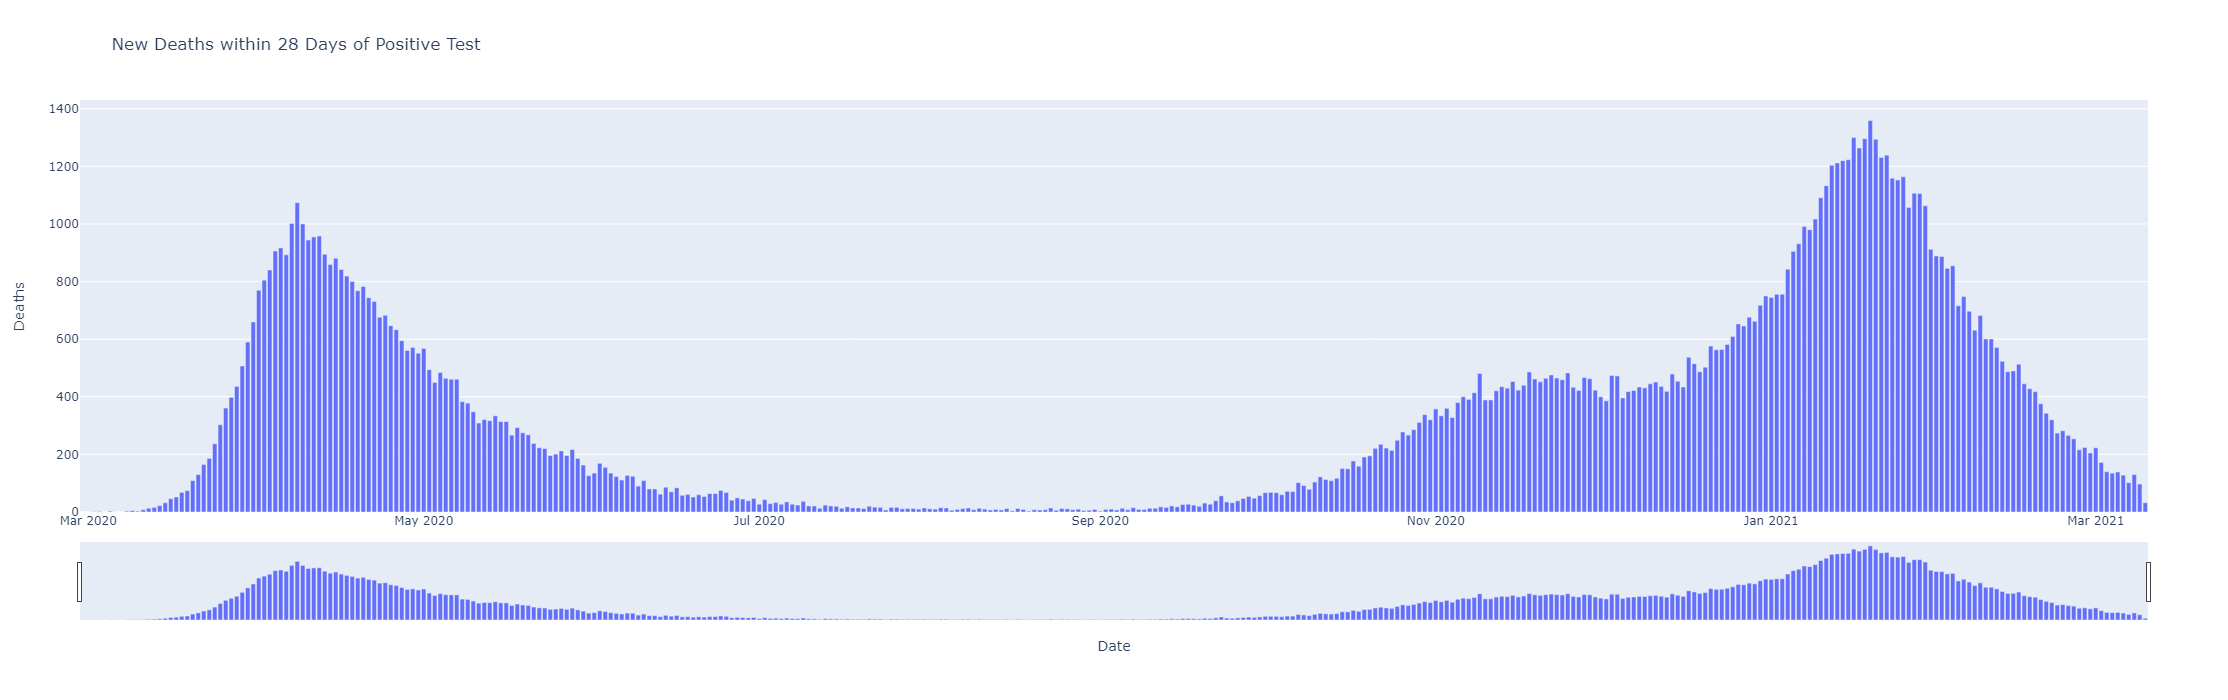

In [196]:
def plot_interactive_bar_chart(df1):
    fig = go.Figure()

    #Create the interactive bar chart
    fig.add_trace(go.Bar(
        x=df1['date'],
        y=df1['newDeaths28DaysByDeathDate'],
        name='New Deaths within 28 Days of Positive Test'
    ))

    #Set the labels and title
    fig.update_layout(
        title='New Deaths within 28 Days of Positive Test',
        xaxis_title='Date',
        yaxis_title='Deaths',
        hovermode='x',
        xaxis=dict(rangeslider=dict(visible=True), type='date'),
        height=700
    )

    #Show the plot
    fig.show()


#Convert the date column to a datetime object
df1['date'] = pd.to_datetime(df1['date'], format='%d/%m/%Y')

#Sort the data by date
df1.sort_values(by='date', inplace=True)

#Call the function to plot the interactive bar chart
plot_interactive_bar_chart(df1)

### Conclusion

* New deaths peaked in January 2021
* Exponential increase in deaths in March 2020
* Considerably low death count during June 2020 - October 2021

### New Patient Admissions

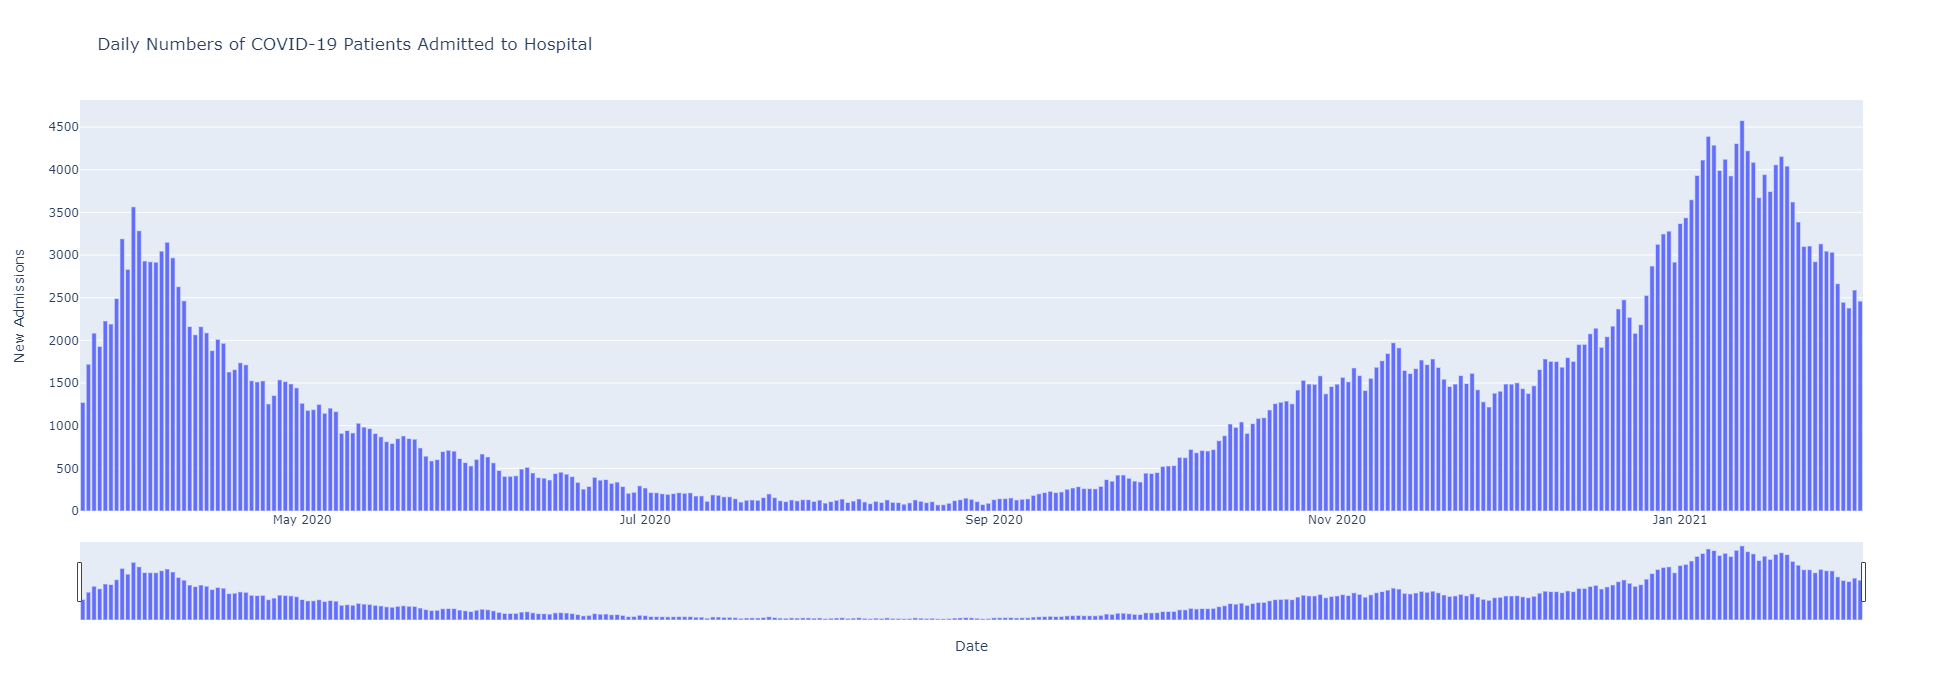

In [197]:
def plot_interactive_bar_chart(df2):
    fig = go.Figure()

    #Create the interactive bar chart
    fig.add_trace(go.Bar(
        x=df2['date'],
        y=df2['newAdmissions'],
        name='Daily numbers of COVID-19 patients admitted to hospital'
    ))

    #Set the labels and title
    fig.update_layout(
        title='Daily Numbers of COVID-19 Patients Admitted to Hospital',
        xaxis_title='Date',
        yaxis_title='New Admissions',
        hovermode='x',
        xaxis=dict(rangeslider=dict(visible=True), type='date'),
        height=700
    )

    #Show the plot
    fig.show()


#Convert the date column to a datetime object
df2['date'] = pd.to_datetime(df2['date'], format='%d/%m/%Y')

#Sort the data by date
df2.sort_values(by='date', inplace=True)

#Call the function to plot the interactive bar chart
plot_interactive_bar_chart(df2)

### Conclusion

* Number of patients peaked in January 2021
* Gradual increase in patients from December 2020
* Considerably low patient count during July 2020 - September 2021

### Patients in Hospital

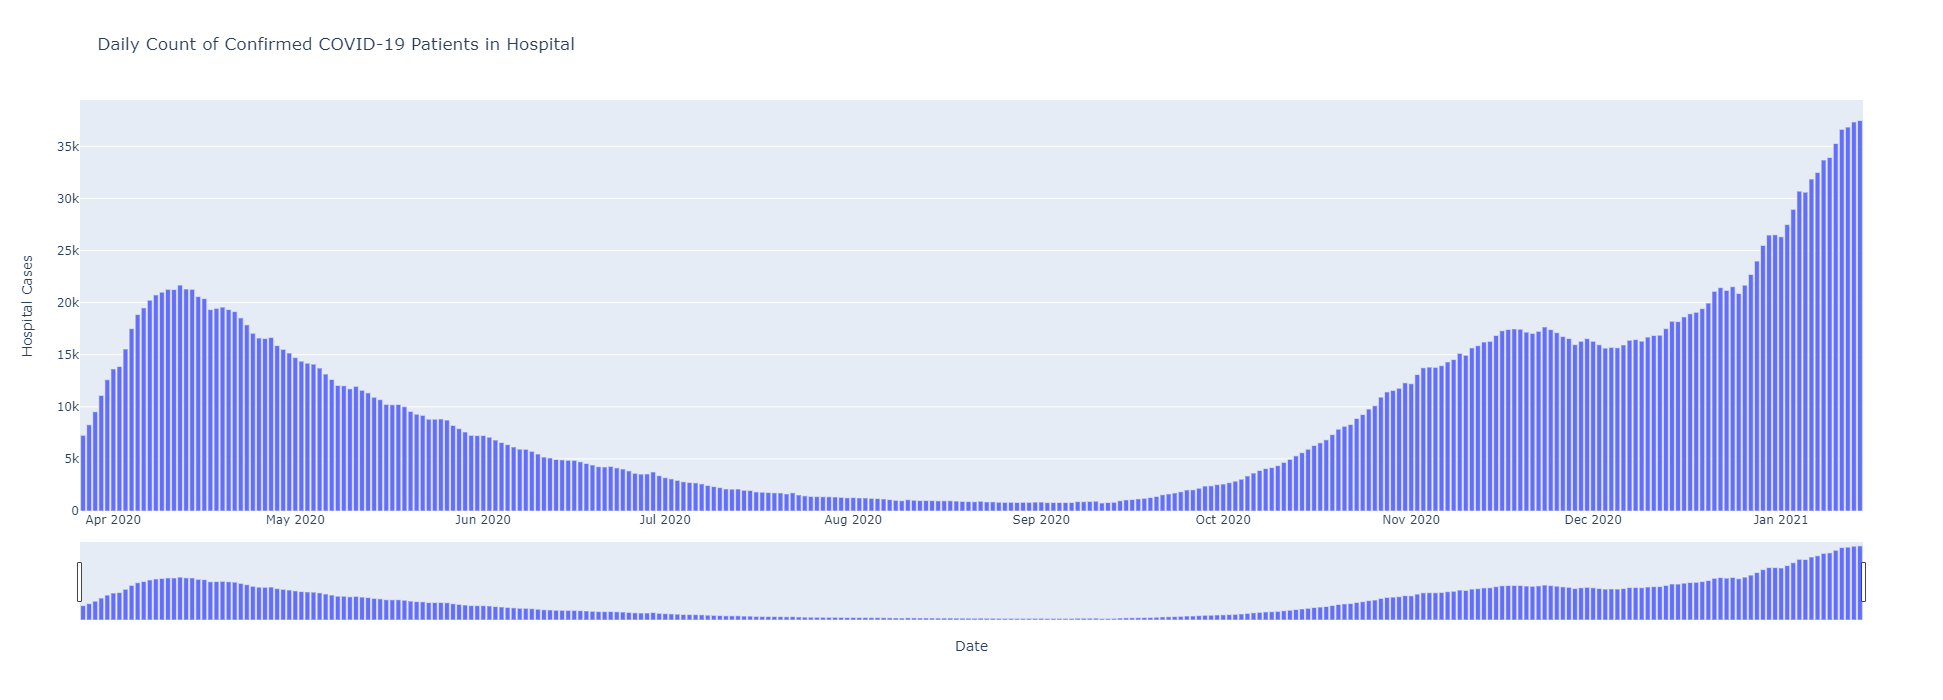

In [198]:
def plot_interactive_bar_chart(df3):
    fig = go.Figure()

    #Create the interactive bar chart
    fig.add_trace(go.Bar(
        x=df3['date'],
        y=df3['hospitalCases'],
        name='Daily count of confirmed COVID-19 patients in hospital'
    ))

    #Set the labels and title
    fig.update_layout(
        title='Daily Count of Confirmed COVID-19 Patients in Hospital',
        xaxis_title='Date',
        yaxis_title='Hospital Cases',
        hovermode='x',
        xaxis=dict(rangeslider=dict(visible=True), type='date'),
        height=700
    )

    #Show the plot
    fig.show()


#Convert the date column to a datetime object
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%Y')

#Sort the data by date
df3.sort_values(by='date', inplace=True)

#Call the function to plot the interactive bar chart
plot_interactive_bar_chart(df3)

### Conclusion

* Number of confirmed cases peaked in January 2021
* Considerably low confirmed cases count during July 2020 - September 2021

### Patients in Beds

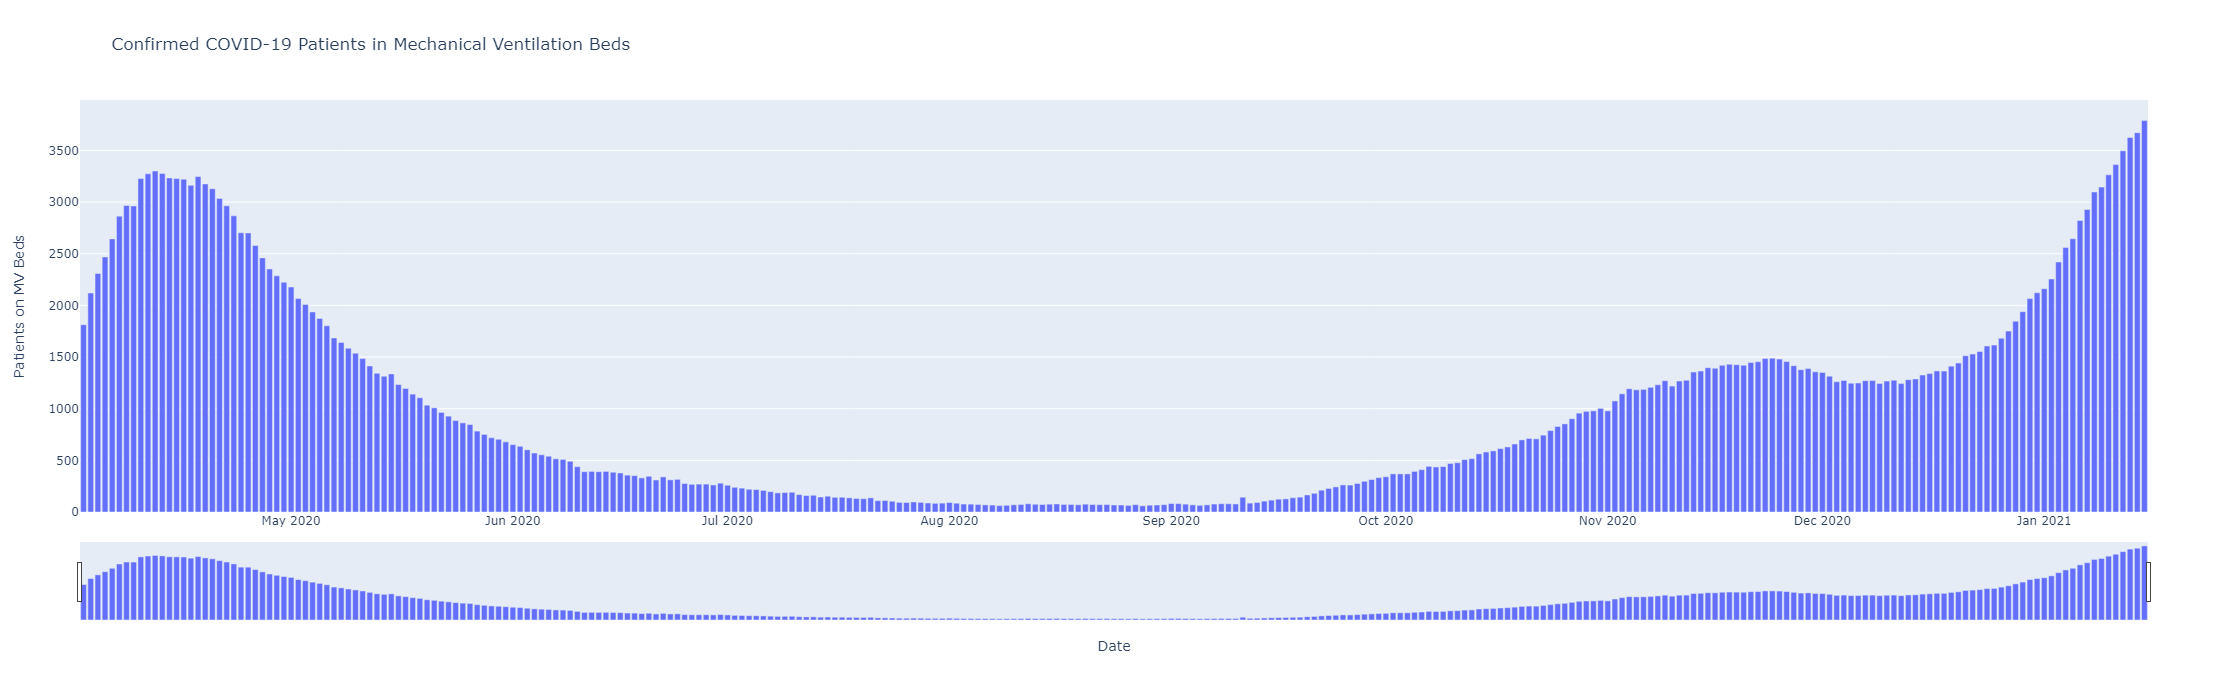

In [199]:
def plot_interactive_bar_chart(df4):
    fig = go.Figure()

    #Create the interactive bar chart
    fig.add_trace(go.Bar(
        x=df4['date'],
        y=df4['covidOccupiedMVBeds'],
        name='Confirmed COVID-19 patients in mechanical ventilation beds'
    ))

    #Set the labels and title
    fig.update_layout(
        title='Confirmed COVID-19 Patients in Mechanical Ventilation Beds',
        xaxis_title='Date',
        yaxis_title='Patients on MV Beds',
        hovermode='x',
        xaxis=dict(rangeslider=dict(visible=True), type='date'),
        height=700
    )

    #Show the plot
    fig.show()


#Convert the date column to a datetime object
df4['date'] = pd.to_datetime(df4['date'], format='%d/%m/%Y')

#Sort the data by date
df4.sort_values(by='date', inplace=True)

#Call the function to plot the interactive bar chart
plot_interactive_bar_chart(df4)

### Conclusion

* Number of patients in MV beds peaked in April 2020 and January 2021 
* Considerably low patient count during July 2020 - September 2021

### Merged Data

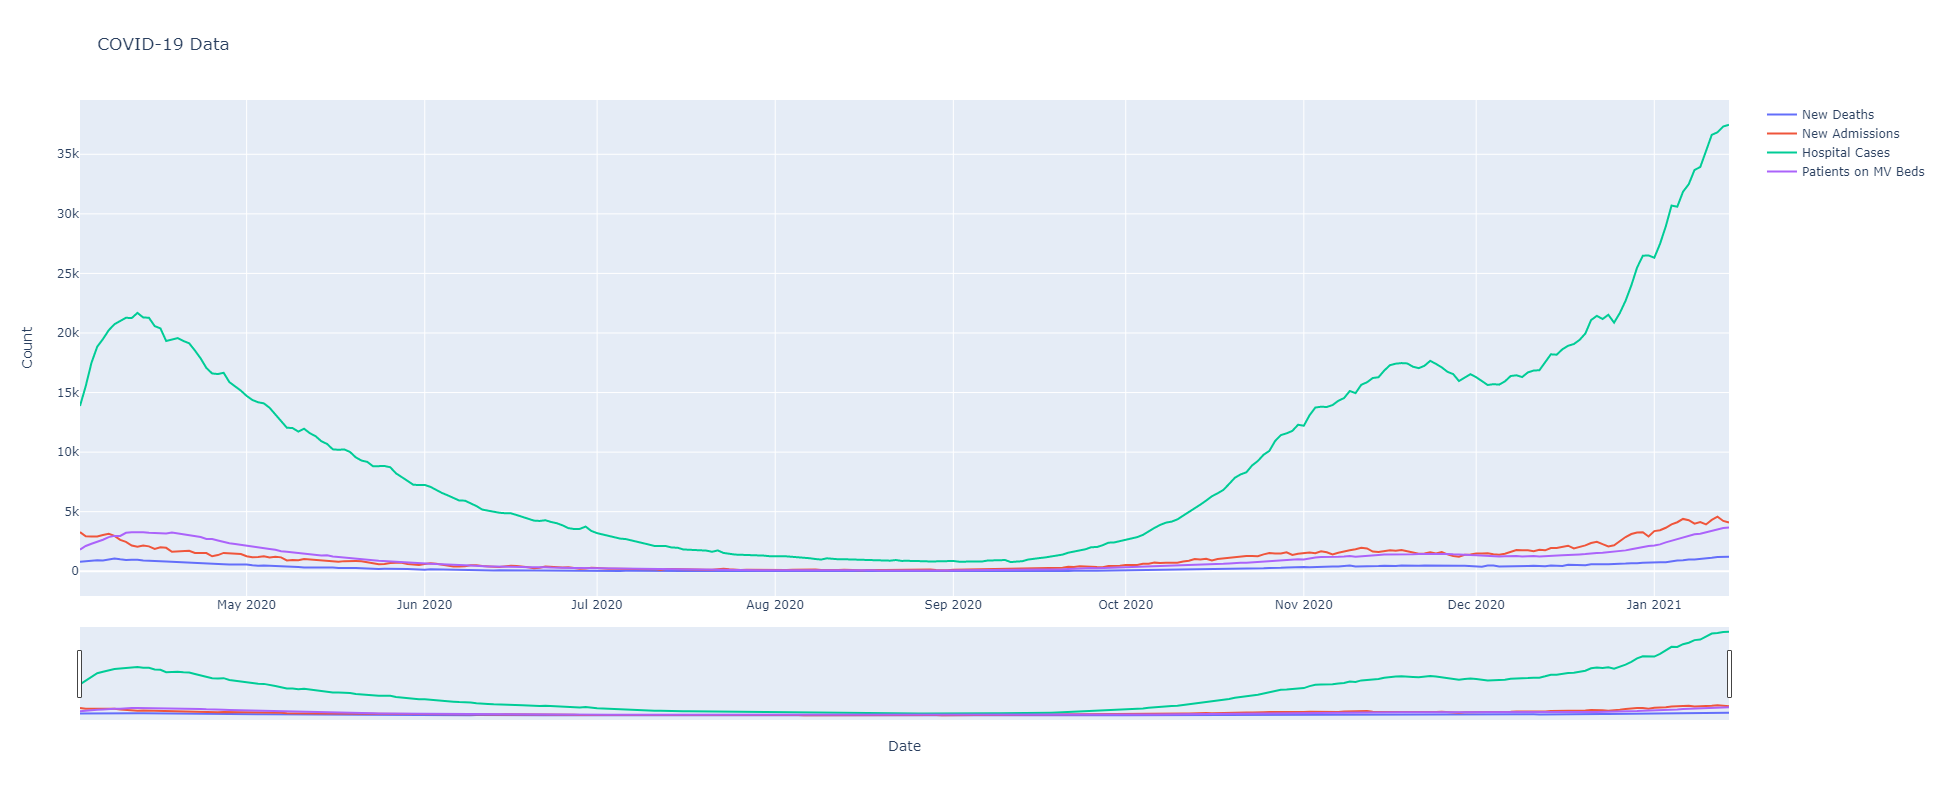

In [200]:
def plot_interactive_line_chart(merged_df):
    fig = go.Figure()

    #Create line traces for each data column
    fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['newDeaths28DaysByDeathDate'], mode='lines', name='New Deaths'))
    fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['newAdmissions'], mode='lines', name='New Admissions'))
    fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['hospitalCases'], mode='lines', name='Hospital Cases'))
    fig.add_trace(go.Scatter(x=merged_df['date'], y=merged_df['covidOccupiedMVBeds'], mode='lines', name='Patients on MV Beds'))

    #Set the labels and title
    fig.update_layout(
        title='COVID-19 Data',
        xaxis_title='Date',
        yaxis_title='Count',
        hovermode='x',
        xaxis=dict(rangeslider=dict(visible=True), type='date'),
        height=800
    )

    #Show the plot
    fig.show()

#Convert the date column to a datetime object
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d/%m/%Y')

#Sort the data by date
merged_df.sort_values(by='date', inplace=True)

#Call the function to plot the interactive line chart
plot_interactive_line_chart(merged_df)

### Conclusion

* All data followed a similar pattern which means there is an evident correlation between the metrics

## Solution Ideas

Based on the EDA, I have observed strong correlations between various COVID-19 metrics. This knowledge allows me to propose data-driven strategies to address the research question. For instance, we can develop models to predict the number of deaths based on new admissions or hospital cases, which would enable policymakers to make informed decisions in allocating resources and managing healthcare facilities. Additionally, understanding the relationships between these metrics can help identify patterns or trends, which could guide public health interventions and contribute to a more effective response to the pandemic. The EDA findings serve as a foundation for these solution ideas and emphasise the importance of data-driven decision-making in combating COVID-19.

# Data Mining

## Correlation Analysis

By conducting a correlation analysis, I can identify the strength and direction of any linear associations between these variables, which can provide valuable insights into how these metrics influence each other over time. Understanding these relationships can help healthcare professionals and researchers make informed decisions when implementing measures to manage the pandemic. Moreover, the results of the correlation analysis can guide future research to investigate potential causal relationships between the variables and potentially uncover underlying mechanisms driving the observed trends.

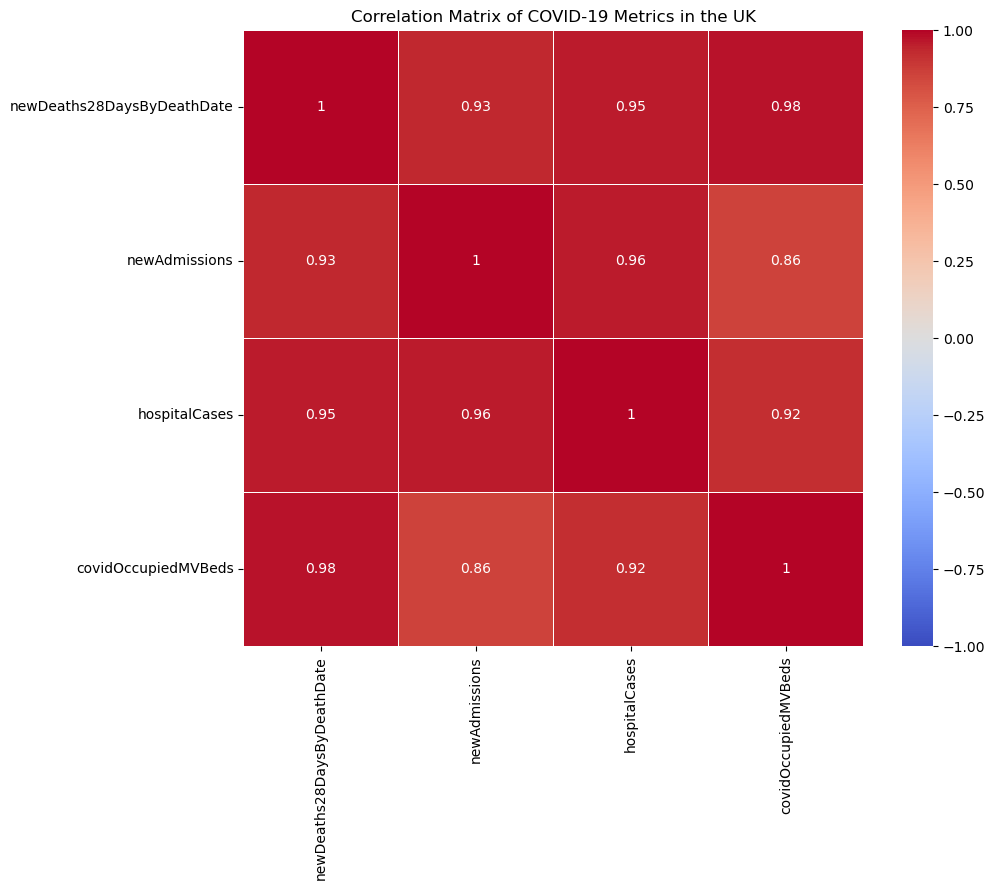

In [201]:
correlation_matrix = merged_df.corr()

#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of COVID-19 Metrics in the UK")
plt.show()

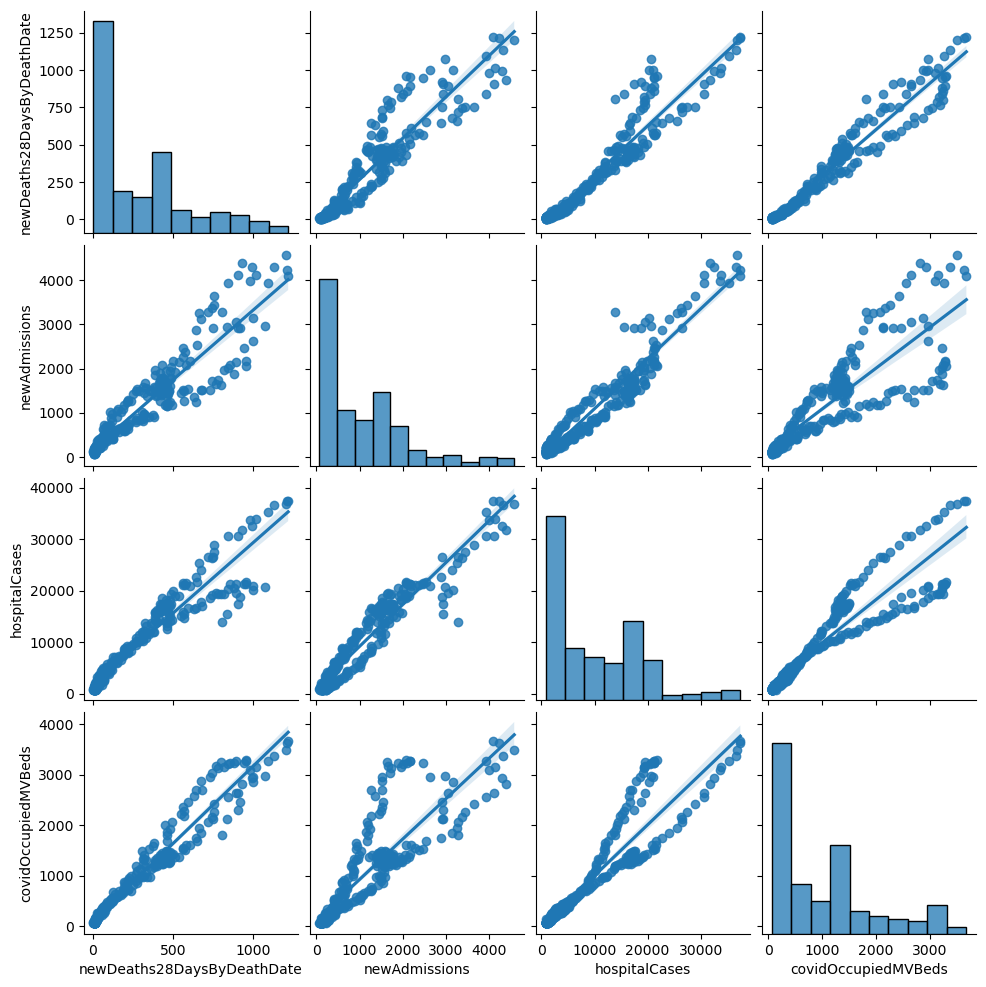

In [202]:
#Plot the scatter chart with a line of regression
sns.pairplot(merged_df, kind='reg')
plt.show()

## Conclusion

In conclusion, the strong correlations (ranging from 0.86 to 0.98) between various COVID-19 metrics in the United Kingdom, as revealed by the analysis, emphasise the importance of a comprehensive approach in addressing the pandemic. These findings imply that the impact of the virus on the healthcare system and population health is closely interconnected, necessitating consideration of these interdependencies when formulating strategies to combat the virus.

The high correlation coefficients highlight the need for targeted public health measures, optimised resource allocation, and effective communication between healthcare providers and the public. Continuous monitoring and evaluation of these relationships are crucial as the pandemic evolves, with new strains and interventions emerging. Future research should explore the causal mechanisms underlying these relationships to better understand the dynamics of the pandemic and optimise interventions. Overall, a well-structured, critical analysis of COVID-19 metrics correlations provides a solid foundation for evidence-based decision-making, contributing to ongoing efforts to combat the pandemic.

## Decision Tree Algorithm

A decision tree algorithm is suitable for this research question, as it visually represents relationships between COVID-19 metrics and their impact on deaths over time. Decision trees enable clear understanding of influential variables and are easily interpretable, aiding communication of findings. By analysing relationships between deaths, new admissions, hospital cases, and patients in mechanical ventilation beds using a decision tree, we can gain valuable insights to support ongoing pandemic response efforts.

In [203]:
#Set a threshold for high or low deaths 
threshold = 350
merged_df['high_deaths'] = (merged_df['newDeaths28DaysByDeathDate'] > threshold).astype(int)

#Define features and target variable
X = merged_df[['newAdmissions', 'hospitalCases', 'covidOccupiedMVBeds']]
y = merged_df['high_deaths']

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=5)  
clf.fit(X_train, y_train)

#Make predictions
y_pred = clf.predict(X_test)

In [204]:
#Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[53  1]
 [ 1 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.97      0.97      0.97        33

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



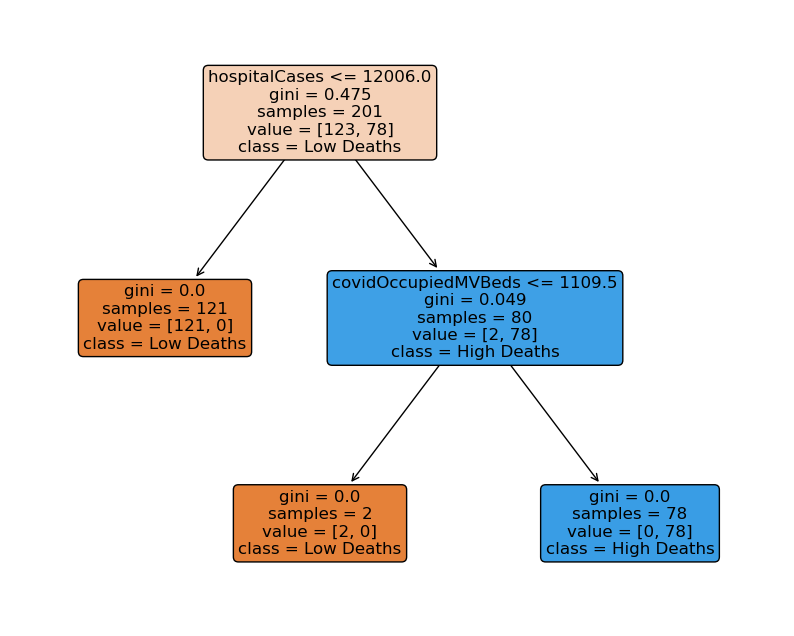

In [205]:
#Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Low Deaths', 'High Deaths'], filled=True, rounded=True, fontsize=12)
plt.show()

## Conclusion

In conclusion, the decision tree algorithm provided a clear model to analyse the relationship between COVID-19 metrics and high death rates in the United Kingdom. The tree shows that the primary deciding factor is the number of hospital cases, followed by patients in mechanical ventilation beds, and new admissions.

This decision tree model highlights the critical role of hospital capacity in managing death rates during the pandemic. Regions with more than 12,006 hospital cases tend to have higher death rates. Furthermore, within this group, areas with over 1,110 patients in mechanical ventilation beds consistently exhibit higher death rates. In regions with fewer mechanical ventilation bed patients, new admissions also play a role in determining the death rates.

The results highlight the importance of effective resource allocation and healthcare system management during the pandemic. Policymakers should prioritise interventions addressing hospital capacity and patient care to reduce COVID-19 death rates. The decision tree model serves as a valuable tool for understanding complex relationships and guiding data-driven decision-making in the ongoing fight against the pandemic.